In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Whatsapp Group Chat Data Analysis using python.


A typical data science project would involve 5 steps. The first step is Data Collection. In this case Data collection involves

Opening Whatsapp group chat.
Go to Settings.
Click on Export Chat.
Click on without media.

In [ ]:
# imojis library
!pip install emoji

In [3]:
# necessary libraries imported
import re
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
% matplotlib inline

In [ ]:
! git clone https://github.com/amueller/word_cloud.git
% cd word_cloud
! pip install .

# **Data Preparation**
Data PrepaThis part looks at sorting the information from the group in a dataframe format 

Let us consider just a single line from the text (which we will call “raw text”) and see how we can extract relevant columns from it:

2020-01-16	9:32 AM		+254 722 117028 changed to +254 724 973754

In our sample line of text, our main objective is to automatically break down the raw message into 4 tokens.

{Date}, {Time} - {Author}: {Message}







In [4]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9][0-9]) (AM|PM|am|pm)? -'
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [5]:
def FindAuthor(s):
    patterns = [
        '([\w]+):',                        # First Name
        '([\w]+[\s]+[\w]+):',              # First Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
        '([+]\d{2} \d{5} \d{5}):',         # Mobile Number (Kenya)
        '([+]\d{2} \d{3} \d{3} \d{4}):',   # Mobile Number (Kenya)
        '([\w]+)[\u263a-\U0001f999]+:',    # Name and Emoji              
    ]
    pattern = '^' + '|'.join(patterns)
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [6]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message


In [7]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversationPath = '/content/drive/My Drive/WhatsApp Chat with EA CEOs Forum 2020 (1).txt' 
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

In [8]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])

In [9]:
df.head()

,Date,Time,Author,Message
0,2020-01-16,9:32 AM,None,+254 722 117028 changed to +254 724 973754
1,2020-01-16,9:34 AM,None,+254 724 973754 changed to +254 722 117028
2,2020-01-16,1:45 PM,None,You added Kosgey Clive
3,2020-01-16,2:29 PM,Kosgey Clive,Thanks for the add
4,2020-01-16,2:36 PM,None,+254 722 306734 left


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5373 entries, 0 to 5372
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     5373 non-null   datetime64[ns]
 1   Time     5373 non-null   object        
 2   Author   2008 non-null   object        
 3   Message  5373 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 168.0+ KB


## Printing Participants

In [11]:
df.Author.unique()

array([None, 'Kosgey Clive', 'Kimani Patrick', 'Daisy',
       'Joseph Obel Ochieng', 'Caroline Kusimba', 'Cecilia',
       'Michael YCB', 'James Midunga', 'John Mwanu', 'Millicent Wangui',
       'Zawadi Eunice', 'Muriithi Ngari', 'Tushar Vyas', 'Ms Maria',
       'Sylvia Kendi', 'Josephine Irungu', 'Ads Patricia',
       'Junky Bins Lucy', 'Joseph Njuguna Maina', 'Mageto', 'Ian Dennis',
       'Stephen Njoroge', 'Paul Mugo', 'Radido', 'Tony Mwongela',
       'Njoki Waigwa', 'Violin Nzioka', 'Sheilla Koileken', 'Ashley',
       'Angela', 'Sammy Kibe', 'Magazine Emmanuella Aboa',
       'Karanja Kiarie', 'Nancy Amunga', 'David Macharia', 'Emma Kavuku',
       'Odipo Otieno', 'Shirlene Nafula', 'Cliff CEO',
       'UrbanTex Kabegi Muturi', 'Counselor Cynthia Mutheu',
       'Shieh Gicheru', 'Magazine Blevince Okeyo', 'Phanuel Chebii',
       'Peter Gakingo YCB2020', 'Bayes Wakubwa Miquel',
       'Boniface Kimoni CFO', 'Cyrus Senior', 'Inversk Intern Philip'],
      dtype=object)

**None** which is the first element in array indicates few messages which do not have authors like,


*   Group was created.
*   Teja was added and so on.



Let us remove the messages created by None

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348 entries, 2 to 1947
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1348 non-null   datetime64[ns]
 1   Time     1348 non-null   object        
 2   Author   1348 non-null   object        
 3   Message  1348 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 52.7+ KB


In [12]:
df.Author.unique()

array([None, 'Kosgey Clive', 'Kimani Patrick', 'Daisy',
       'Joseph Obel Ochieng', 'Caroline Kusimba', 'Cecilia',
       'Michael YCB', 'James Midunga', 'John Mwanu', 'Millicent Wangui',
       'Zawadi Eunice', 'Muriithi Ngari', 'Tushar Vyas', 'Ms Maria',
       'Sylvia Kendi', 'Josephine Irungu', 'Ads Patricia',
       'Junky Bins Lucy', 'Joseph Njuguna Maina', 'Mageto', 'Ian Dennis',
       'Stephen Njoroge', 'Paul Mugo', 'Radido', 'Tony Mwongela',
       'Njoki Waigwa', 'Violin Nzioka', 'Sheilla Koileken', 'Ashley',
       'Angela', 'Sammy Kibe', 'Magazine Emmanuella Aboa',
       'Karanja Kiarie', 'Nancy Amunga', 'David Macharia', 'Emma Kavuku',
       'Odipo Otieno', 'Shirlene Nafula', 'Cliff CEO',
       'UrbanTex Kabegi Muturi', 'Counselor Cynthia Mutheu',
       'Shieh Gicheru', 'Magazine Blevince Okeyo', 'Phanuel Chebii',
       'Peter Gakingo YCB2020', 'Bayes Wakubwa Miquel',
       'Boniface Kimoni CFO', 'Cyrus Senior', 'Inversk Intern Philip'],
      dtype=object)

We successfully removed None author.

# Group Wise Stats.

In [13]:
total_messages = df.shape[0]
print(total_messages)

5373


Let us now find out the total Media Messages

In [14]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print(media_messages)

310


In [15]:
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

df["emoji"] = df["Message"].apply(split_count)

In [16]:
emojis = sum(df['emoji'].str.len())
print(emojis)

3175


In [17]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()


In [18]:
links = np.sum(df.urlcount)

In [19]:
print("Group Wise Stats")
print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

Group Wise Stats
Messages: 5373
Media: 310
Emojis: 3175
Links: 939


## Let us Separate the media messages and text messages

In [20]:
media_messages_df = df[df['Message'] == '<Media omitted>']

In [21]:
messages_df = df.drop(media_messages_df.index)

In [22]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5063 entries, 0 to 5372
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5063 non-null   datetime64[ns]
 1   Time      5063 non-null   object        
 2   Author    1698 non-null   object        
 3   Message   5063 non-null   object        
 4   emoji     5063 non-null   object        
 5   urlcount  5063 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 276.9+ KB


It might be interesting to count the number of letters and words used by each author in each message. So, let us add 2 new columns to the data frame called “Letter_Count” and “Word_Count”, using the following code:

In [23]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

In [24]:
messages_df.head()

,Date,Time,Author,Message,emoji,urlcount,Letter_Count,Word_Count,MessageCount
0,2020-01-16,9:32 AM,None,+254 722 117028 changed to +254 724 973754,[],0,42,4,1
1,2020-01-16,9:34 AM,None,+254 724 973754 changed to +254 722 117028,[],0,42,4,1
2,2020-01-16,1:45 PM,None,You added Kosgey Clive,[],0,22,4,1
3,2020-01-16,2:29 PM,Kosgey Clive,Thanks for the add,[],0,18,4,1
4,2020-01-16,2:36 PM,None,+254 722 306734 left,[],0,20,4,1


In [25]:
messages_df["emojicount"]= df['emoji'].str.len()

#Author wise stats

In [26]:
# Creates a list of unique Authors - ['Kimani patrick', 'Kosgey Clive', .........]
l = messages_df.Author.unique()

for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)   
  print()

Stats of None -
Messages Sent 0
Words per message nan
Media Messages Sent 0
Emojis Sent 0
Links Sent 0

Stats of Kosgey Clive -
Messages Sent 7
Words per message 233.0
Media Messages Sent 1
Emojis Sent 0
Links Sent 0

Stats of Kimani Patrick -
Messages Sent 321
Words per message 42.71028037383178
Media Messages Sent 96
Emojis Sent 270
Links Sent 123

Stats of Daisy -
Messages Sent 136
Words per message 281.8529411764706
Media Messages Sent 5
Emojis Sent 1458
Links Sent 595

Stats of Joseph Obel Ochieng -
Messages Sent 2
Words per message 1.5
Media Messages Sent 0
Emojis Sent 0
Links Sent 0

Stats of Caroline Kusimba -
Messages Sent 45
Words per message 26.844444444444445
Media Messages Sent 3
Emojis Sent 5
Links Sent 1

Stats of Cecilia -
Messages Sent 54
Words per message 5.962962962962963
Media Messages Sent 1
Emojis Sent 31
Links Sent 3

Stats of Michael YCB -
Messages Sent 63
Words per message 24.682539682539684
Media Messages Sent 6
Emojis Sent 23
Links Sent 6

Stats of James Midu

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning:

invalid value encountered in long_scalars



# Most used Emoji in Group

# Emoji Stats

### Unique emojis used in group

In [27]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)
print(total_emojis)

223


### Most used emoji

In [28]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
print(emoji_dict)

[('👇🏻', 1487), ('😂', 169), ('😊', 80), ('👇🏾', 77), ('🤣', 66), ('👇', 62), ('🤔', 52), ('😅', 51), ('👍', 50), ('✅', 49), ('👇🏽', 37), ('👏', 34), ('👌', 30), ('👏🏽', 30), ('🙏', 24), ('👌🏾', 23), ('😁', 23), ('😍', 22), ('👍🏼', 21), ('👌🏽', 20), ('😭', 20), ('👏🏼', 19), ('👌🏼', 19), ('😆', 19), ('🙏🏾', 18), ('🔥', 17), ('👏🏾', 17), ('😃', 15), ('😄', 14), ('💯', 13), ('😔', 13), ('👆', 13), ('🚫', 12), ('🙂', 12), ('😀', 12), ('🇰🇪', 12), ('👍🏾', 10), ('\U0001f973', 10), ('🙏🏽', 9), ('✨', 9), ('😳', 9), ('😜', 9), ('💪', 9), ('💪🏽', 9), ('👊🏾', 8), ('👍🏽', 8), ('🐓', 8), ('❤', 8), ('😉', 8), ('🤦🏾\u200d♂️', 8), ('🤗', 8), ('❓', 8), ('♥️', 8), ('🤝🏽', 7), ('👍🏿', 7), ('🙄', 7), ('🏃\u200d♀️', 7), ('🤓', 7), ('👏🏿', 7), ('✋🏽', 6), ('\U0001f97a', 6), ('\U0001f929', 6), ('👌🏻', 6), ('☺️', 6), ('🙏🏿', 5), ('🤑', 5), ('👋', 5), ('🙏🏻', 5), ('👆🏾', 5), ('🔶', 5), ('✋🏼', 5), ('😇', 5), ('👇🏼', 4), ('💸', 4), ('👉', 4), ('⚰', 4), ('🙈', 4), ('\U0001f928', 4), ('🙆🏾\u200d♂️', 4), ('☝🏾', 4), ('💵', 4), ('💰', 4), ('💪🏼', 4), ('👊🏻', 4), ('👍🏻', 3), ('📞', 3), ('👆

In [29]:
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df

,emoji,count
0,👇🏻,1487
1,😂,169
2,😊,80
3,👇🏾,77
4,🤣,66
...,...,...
218,🤷🏾‍♀️,1
219,©,1
220,🕵️‍♂️,1
221,✊,1


We can see '😂 '   dominates the list.

### Emoji distribution visualisation

In [30]:
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### Person Wise Emoji Distribution

In [31]:
# Creates a list of unique Authors - ['Manikanta', 'Teja Kura', .........]
l = messages_df.Author.unique()
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  total_emojis_list = list([a for b in dummy_df.emoji for a in b])
  emoji_dict = dict(Counter(total_emojis_list))
  emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
  print('Emoji Distribution for', l[i])
  author_emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
  fig = px.pie(author_emoji_df, values='count', names='emoji')
  fig.update_traces(textposition='inside', textinfo='percent+label')
  fig.show()

Emoji Distribution for None


Emoji Distribution for Kosgey Clive


Emoji Distribution for Kimani Patrick


Emoji Distribution for Daisy


Emoji Distribution for Joseph Obel Ochieng


Emoji Distribution for Caroline Kusimba


Emoji Distribution for Cecilia


Emoji Distribution for Michael YCB


Emoji Distribution for James Midunga


Emoji Distribution for Millicent Wangui


Emoji Distribution for Zawadi Eunice


Emoji Distribution for Muriithi Ngari


Emoji Distribution for Tushar Vyas


Emoji Distribution for Ms Maria


Emoji Distribution for Sylvia Kendi


Emoji Distribution for Josephine Irungu


Emoji Distribution for Ads Patricia


Emoji Distribution for Ian Dennis


Emoji Distribution for Stephen Njoroge


Emoji Distribution for Radido


Emoji Distribution for Tony Mwongela


Emoji Distribution for Njoki Waigwa


Emoji Distribution for Violin Nzioka


Emoji Distribution for Joseph Njuguna Maina


Emoji Distribution for Paul Mugo


Emoji Distribution for Sheilla Koileken


Emoji Distribution for Ashley


Emoji Distribution for Angela


Emoji Distribution for Sammy Kibe


Emoji Distribution for John Mwanu


Emoji Distribution for Karanja Kiarie


Emoji Distribution for Nancy Amunga


Emoji Distribution for David Macharia


Emoji Distribution for Magazine Emmanuella Aboa


Emoji Distribution for Junky Bins Lucy


Emoji Distribution for Odipo Otieno


Emoji Distribution for Emma Kavuku


Emoji Distribution for Cliff CEO


Emoji Distribution for Counselor Cynthia Mutheu


Emoji Distribution for UrbanTex Kabegi Muturi


Emoji Distribution for Shieh Gicheru


Emoji Distribution for Magazine Blevince Okeyo


Emoji Distribution for Phanuel Chebii


Emoji Distribution for Peter Gakingo YCB2020


Emoji Distribution for Bayes Wakubwa Miquel


Emoji Distribution for Cyrus Senior


Emoji Distribution for Inversk Intern Philip


# Some more Stats

### **Day wise Distribution**

In [33]:
def f(i):
  l = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  return l[i];
day_df=pd.DataFrame(messages_df["Message"])
day_df['day_of_date'] = messages_df['Date'].dt.weekday
day_df['day_of_date'] = day_df["day_of_date"].apply(f)
day_df["messagecount"] = 1
day = day_df.groupby("day_of_date").sum()
day.reset_index(inplace=True)

In [34]:
fig = px.line_polar(day, r='messagecount', theta='day_of_date', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
    )),
  showlegend=False
)
fig.show()

Most of the converstions happens on Wednsedays and Monday. I would recomment if someone is marketing  in that group to be posting the messgaes on those two days

### **Number of messages as times move on**

In [35]:
date_df = messages_df.groupby("Date").sum()
date_df.reset_index(inplace=True)
fig = px.line(date_df, x="Date", y="MessageCount")
fig.update_xaxes(nticks=20)
fig.show()

### **Chatter**

In [36]:
auth = messages_df.groupby("Author").sum()
auth.reset_index(inplace=True)
fig = px.bar(auth, y="Author", x="MessageCount", color='Author', orientation="h",
             color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta"],
             title="Explicit color sequence"
            )

fig.show()

### **When are the group members most active?**

Text(0, 0.5, 'Time')

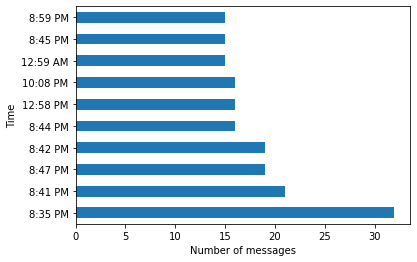

In [37]:
messages_df['Time'].value_counts().head(10).plot.barh() # Top 10 Times of the day at which the most number of messages were sent
plt.xlabel('Number of messages')
plt.ylabel('Time')

### **The most happening day was -**

2020-06-10    200
2020-07-02    185
2020-02-17    180
2020-04-28    149
2020-07-05    126
             ... 
2020-05-31      1
2020-02-01      1
2020-01-22      1
2020-01-18      1
2020-02-08      1
Name: Date, Length: 170, dtype: int64


Text(0, 0.5, 'Date')

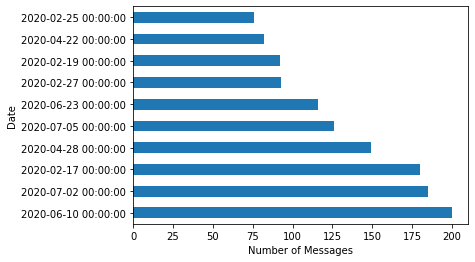

In [38]:
messages_df['Date'].value_counts().head(10).plot.barh()
print(messages_df['Date'].value_counts())
plt.xlabel('Number of Messages')
plt.ylabel('Date')

### **Message Having Maximum number of words**

In [39]:
messages_df.iloc[messages_df['Word_Count'].argmax()]

Date                                          2020-07-08 00:00:00
Time                                                      8:36 PM
Author                                               Kosgey Clive
Message         If You Are Between 25 to 40 Years Of Age, Kind...
emoji                                                          []
urlcount                                                        0
Letter_Count                                                 8150
Word_Count                                                   1577
MessageCount                                                    1
emojicount                                                      0
Name: 5282, dtype: object

### **Word Cloud**

In [40]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))

There are 936817 words in all the messages.


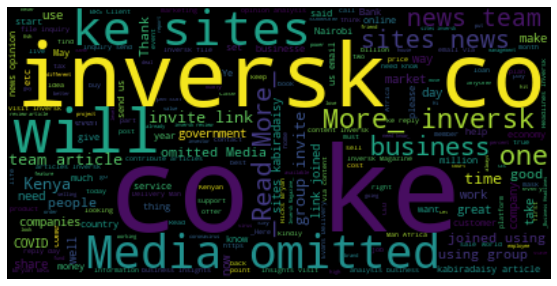

In [42]:
  stopwords = set(STOPWORDS)
  stopwords.update(["ra", "ga", "na", "ani", "em", "ki", "ah","ha","la","eh","ne","le","ni","lo","Ma","Haa","ni"])
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
  # Display the generated image:
  # the matplotlib way:
  
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()